### Albert Seo 

### MSCA 37014 | Python for Analytics | Professor S. Chaudhary | Assignment 3 (Team Project) | Data Cleaning & Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('/Users/jin/Desktop/UChicago/Summer 2020/Python for Analytics/Assignment 3/PERM_FY2020_Q3.xlsx')

In [5]:
df.head(5)
df.shape

(71942, 154)

## Basic Data Transformation

In [6]:
# select columns that we are interested in
data = df[['CASE_STATUS', 'RECEIVED_DATE','DECISION_DATE','EMPLOYER_STATE_PROVINCE','EMPLOYER_NUM_EMPLOYEES','PW_SKILL_LEVEL','PW_WAGE','PW_UNIT_OF_PAY','WAGE_OFFER_FROM','WAGE_OFFER_UNIT_OF_PAY','WORKSITE_STATE','JOB_TITLE','MINIMUM_EDUCATION','REQUIRED_EXPERIENCE','FOREIGN_LANGUAGE_REQUIRED','COUNTRY_OF_CITIZENSHIP','CLASS_OF_ADMISSION']]

In [7]:
# Convert DECISION_DATE to date only
data['DECISION_DATE'] =  pd.to_datetime(data['DECISION_DATE']).apply(lambda x: x.date())
# Convert DECISION_DATE back to datetime format
data['DECISION_DATE'] =  pd.to_datetime(data['DECISION_DATE'])
# Create a new column of CASE_DURATION calculating the duration of case acceptance

data['CASE_DURATION'] = data['DECISION_DATE'] - data['RECEIVED_DATE']
data['CASE_DURATION'] = data['CASE_DURATION'] / np.timedelta64(1, 'D')

<ipython-input-7-18c44c4ac6e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DECISION_DATE'] =  pd.to_datetime(data['DECISION_DATE']).apply(lambda x: x.date())
<ipython-input-7-18c44c4ac6e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DECISION_DATE'] =  pd.to_datetime(data['DECISION_DATE'])
<ipython-input-7-18c44c4ac6e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [8]:
data.head(5)

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_UNIT_OF_PAY,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,REQUIRED_EXPERIENCE,FOREIGN_LANGUAGE_REQUIRED,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,CASE_DURATION
0,Denied,2009-09-03,2020-04-30,ILLINOIS,2.0,Level I,14.49,Hour,14.49,Hour,ILLINOIS,administrative assistant,High School,Y,Y,POLAND,B-2,3892.0
1,Certified-Expired,2010-03-29,2019-10-18,MARYLAND,0.0,Level III,19.36,Hour,19.36,Hour,MARYLAND,MAINTENANCE REPAIRER,High School,N,N,PHILIPPINES,B-2,3490.0
2,Denied,2010-08-10,2020-04-30,NEW YORK,3.0,Level IV,78645.00,Year,38.00,Hour,NEW YORK,PLUMBER,None,Y,N,EL SALVADOR,EWI,3551.0
3,Certified,2011-02-03,2020-05-28,CALIFORNIA,29.0,Level IV,131518.00,Year,131518.00,Year,CALIFORNIA,Programmer Analyst,Bachelor's,Y,N,INDIA,H-1B,3402.0
4,Denied,2011-03-10,2020-06-17,NEW YORK,43.0,Level I,53643.00,Year,53643.00,Year,NEW YORK,PROJECT MANAGER,None,Y,N,IRELAND,NaN,3387.0


In [9]:
# Values that consist PW_UNIT_OF_PAY column
data['PW_UNIT_OF_PAY'].value_counts()

Year         71012
Hour           894
Week            12
Month            9
Bi-Weekly        5
Name: PW_UNIT_OF_PAY, dtype: int64

In [10]:
# Values that consist WAGE_OFFER_UNIT_OF_PAY column
data['WAGE_OFFER_UNIT_OF_PAY'].value_counts()

Year         69184
Hour          2706
Week            21
Month           20
Bi-Weekly        8
Name: WAGE_OFFER_UNIT_OF_PAY, dtype: int64

In [11]:
# Convert PW_wage and WAGE_OFFER_UNIT_OF_PAY rates to salary

data.loc[data['PW_UNIT_OF_PAY'] == 'Year', 'PW_SALARY'] = data['PW_WAGE'] * 1
# Assume working 40 hr / week and there are 52 weeks in a year
data.loc[data['PW_UNIT_OF_PAY'] == 'Hour', 'PW_SALARY'] = data['PW_WAGE'] * 40 * 52
data.loc[data['PW_UNIT_OF_PAY'] == 'Week', 'PW_SALARY'] = data['PW_WAGE'] * 52
data.loc[data['PW_UNIT_OF_PAY'] == 'Month', 'PW_SALARY'] = data['PW_WAGE'] * 12
data.loc[data['PW_UNIT_OF_PAY'] == 'Bi-Weekly', 'PW_SALARY'] = data['PW_WAGE'] * 26

data.loc[data['WAGE_OFFER_UNIT_OF_PAY'] == 'Year', 'OFFERED_SALARY'] = data['WAGE_OFFER_FROM'] * 1
# Assume working 40 hr / week and there are 52 weeks in a year
data.loc[data['WAGE_OFFER_UNIT_OF_PAY'] == 'Hour', 'OFFERED_SALARY'] = data['WAGE_OFFER_FROM'] * 40 * 52
data.loc[data['WAGE_OFFER_UNIT_OF_PAY'] == 'Week', 'OFFERED_SALARY'] = data['WAGE_OFFER_FROM'] * 52
data.loc[data['WAGE_OFFER_UNIT_OF_PAY'] == 'Month', 'OFFERED_SALARY'] = data['WAGE_OFFER_FROM'] * 12
data.loc[data['WAGE_OFFER_UNIT_OF_PAY'] == 'Bi-Weekly', 'OFFERED_SALARY'] = data['WAGE_OFFER_FROM'] * 26

/Users/jin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
data.head(5)

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_UNIT_OF_PAY,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,REQUIRED_EXPERIENCE,FOREIGN_LANGUAGE_REQUIRED,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,CASE_DURATION,PW_SALARY,OFFERED_SALARY
0,Denied,2009-09-03,2020-04-30,ILLINOIS,2.0,Level I,14.49,Hour,14.49,Hour,ILLINOIS,administrative assistant,High School,Y,Y,POLAND,B-2,3892.0,30139.2,30139.2
1,Certified-Expired,2010-03-29,2019-10-18,MARYLAND,0.0,Level III,19.36,Hour,19.36,Hour,MARYLAND,MAINTENANCE REPAIRER,High School,N,N,PHILIPPINES,B-2,3490.0,40268.8,40268.8
2,Denied,2010-08-10,2020-04-30,NEW YORK,3.0,Level IV,78645.00,Year,38.00,Hour,NEW YORK,PLUMBER,None,Y,N,EL SALVADOR,EWI,3551.0,78645.0,79040.0
3,Certified,2011-02-03,2020-05-28,CALIFORNIA,29.0,Level IV,131518.00,Year,131518.00,Year,CALIFORNIA,Programmer Analyst,Bachelor's,Y,N,INDIA,H-1B,3402.0,131518.0,131518.0
4,Denied,2011-03-10,2020-06-17,NEW YORK,43.0,Level I,53643.00,Year,53643.00,Year,NEW YORK,PROJECT MANAGER,None,Y,N,IRELAND,NaN,3387.0,53643.0,53643.0


In [13]:
data['EMPLOYER_NUM_EMPLOYEES']

0          2.0
1          0.0
2          3.0
3         29.0
4         43.0
         ...  
71937    515.0
71938     94.0
71939     62.0
71940     10.0
71941    150.0
Name: EMPLOYER_NUM_EMPLOYEES, Length: 71942, dtype: float64

In [14]:
# Check NAs
data.isnull().sum(axis = 0)

CASE_STATUS                     0
RECEIVED_DATE                   5
DECISION_DATE                   0
EMPLOYER_STATE_PROVINCE         1
EMPLOYER_NUM_EMPLOYEES          9
PW_SKILL_LEVEL               4303
PW_WAGE                         8
PW_UNIT_OF_PAY                 10
WAGE_OFFER_FROM                 4
WAGE_OFFER_UNIT_OF_PAY          3
WORKSITE_STATE                  4
JOB_TITLE                      13
MINIMUM_EDUCATION               6
REQUIRED_EXPERIENCE             2
FOREIGN_LANGUAGE_REQUIRED       0
COUNTRY_OF_CITIZENSHIP          6
CLASS_OF_ADMISSION           5854
CASE_DURATION                   5
PW_SALARY                      11
OFFERED_SALARY                  5
dtype: int64

In [15]:
# Drop NA float columns
data=data.dropna(subset = ['PW_WAGE'])
data=data.dropna(subset = ['WAGE_OFFER_FROM'])
data=data.dropna(subset = ['PW_UNIT_OF_PAY'])
data=data.dropna(subset = ['WAGE_OFFER_UNIT_OF_PAY'])
data=data.dropna(subset = ['CASE_DURATION'])
data=data.dropna(subset = ['PW_SALARY'])
data=data.dropna(subset = ['OFFERED_SALARY'])
data=data.dropna(subset = ['EMPLOYER_STATE_PROVINCE'])
data=data.dropna(subset = ['EMPLOYER_NUM_EMPLOYEES'])
data=data.dropna(subset = ['PW_SKILL_LEVEL'])
data=data.dropna(subset = ['WORKSITE_STATE'])
data=data.dropna(subset = ['JOB_TITLE'])
data=data.dropna(subset = ['REQUIRED_EXPERIENCE'])
data=data.dropna(subset = ['COUNTRY_OF_CITIZENSHIP'])
data=data.dropna(subset = ['CLASS_OF_ADMISSION'])
data=data.dropna(subset = ['MINIMUM_EDUCATION'])
data=data.drop(data['EMPLOYER_NUM_EMPLOYEES'].idxmax())

data.isnull().sum(axis = 0)

CASE_STATUS                  0
RECEIVED_DATE                0
DECISION_DATE                0
EMPLOYER_STATE_PROVINCE      0
EMPLOYER_NUM_EMPLOYEES       0
PW_SKILL_LEVEL               0
PW_WAGE                      0
PW_UNIT_OF_PAY               0
WAGE_OFFER_FROM              0
WAGE_OFFER_UNIT_OF_PAY       0
WORKSITE_STATE               0
JOB_TITLE                    0
MINIMUM_EDUCATION            0
REQUIRED_EXPERIENCE          0
FOREIGN_LANGUAGE_REQUIRED    0
COUNTRY_OF_CITIZENSHIP       0
CLASS_OF_ADMISSION           0
CASE_DURATION                0
PW_SALARY                    0
OFFERED_SALARY               0
dtype: int64

In [16]:
# Convert numeric columns to integer
data['PW_WAGE'] = data['PW_WAGE'].astype(int)
data['WAGE_OFFER_FROM'] = data['WAGE_OFFER_FROM'].astype(int)
data['PW_SALARY'] = data['PW_SALARY'].astype(int)
data['OFFERED_SALARY'] = data['OFFERED_SALARY'].astype(int)
data['EMPLOYER_NUM_EMPLOYEES'] = data['EMPLOYER_NUM_EMPLOYEES'].astype(int)
data['CASE_DURATION'] = data['CASE_DURATION'].astype(int)


# Capitalize the title of each elements in each respectful columns 
data['EMPLOYER_STATE_PROVINCE'] = data['EMPLOYER_STATE_PROVINCE'].str.title()
data['WORKSITE_STATE'] = data['WORKSITE_STATE'].str.title()
data['JOB_TITLE'] = data['JOB_TITLE'].str.title()
data['COUNTRY_OF_CITIZENSHIP'] = data['COUNTRY_OF_CITIZENSHIP'].str.title()

In [17]:
data['SALARY_LEVEL'] = np.where(data['OFFERED_SALARY']<=9875,'0 to 9,875',
                                (np.where(data['OFFERED_SALARY']<=40125,'9,876 to 40,125',
                                    (np.where(data['OFFERED_SALARY']<=85525,'40,126 to 85,525',
                                        (np.where(data['OFFERED_SALARY']<=163300,'85,526 to 163,300',
                                            (np.where(data['OFFERED_SALARY']<=207350,'163,301 to 207,350',
                                                (np.where(data['OFFERED_SALARY']<=518400,'207,351 to 518,400',
                                                    (np.where(data['OFFERED_SALARY']>=518401,'518,401 or more','NA')))))))))))))

data['COMPANY_SIZE'] = np.where(data['EMPLOYER_NUM_EMPLOYEES']<=4,'1 to 4 employees',
                               (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=9,'5 to 9 employees',
                                         (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=19,'10 to 19 employees',
                                                  (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=49,'20 to 49 employees',
                                                          (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=99,'50 to 99 employees',
                                                                   (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=249,'100 to 249 employees',
                                                                            (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=499,'250 to 499 employees',
                                                                                     (np.where(data['EMPLOYER_NUM_EMPLOYEES']<=999,'500 to 999 employees',
                                                                                              (np.where(data['EMPLOYER_NUM_EMPLOYEES']>=1000,'1000 or more','NA')))))))))))))))))

In [18]:
cleaned = data[['CASE_STATUS','PW_SKILL_LEVEL','WORKSITE_STATE','JOB_TITLE','MINIMUM_EDUCATION','REQUIRED_EXPERIENCE','FOREIGN_LANGUAGE_REQUIRED','COUNTRY_OF_CITIZENSHIP','CLASS_OF_ADMISSION','CASE_DURATION','SALARY_LEVEL','COMPANY_SIZE']]
cleaned.head(20)

,CASE_STATUS,PW_SKILL_LEVEL,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,REQUIRED_EXPERIENCE,FOREIGN_LANGUAGE_REQUIRED,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,CASE_DURATION,SALARY_LEVEL,COMPANY_SIZE
0,Denied,Level I,Illinois,Administrative Assistant,High School,Y,Y,Poland,B-2,3892,"9,876 to 40,125",1 to 4 employees
1,Certified-Expired,Level III,Maryland,Maintenance Repairer,High School,N,N,Philippines,B-2,3490,"40,126 to 85,525",1 to 4 employees
2,Denied,Level IV,New York,Plumber,None,Y,N,El Salvador,EWI,3551,"40,126 to 85,525",1 to 4 employees
3,Certified,Level IV,California,Programmer Analyst,Bachelor's,Y,N,India,H-1B,3402,"85,526 to 163,300",20 to 49 employees
5,Denied,Level I,Massachusetts,International Business Expansion Analyst,Other,Y,N,France,H-1B,3325,"85,526 to 163,300",1000 or more
6,Certified-Expired,Level III,Illinois,Emc Test Engineer,Bachelor's,Y,N,India,H-1B,82,"85,526 to 163,300",500 to 999 employees
7,Certified-Expired,Level IV,Vermont,Systems Engineer,Master's,N,N,India,H-1B,2984,"40,126 to 85,525",250 to 499 employees
8,Denied,Level IV,New York,Italian Style Specialty Cook,None,Y,N,Ecuador,EWI,3246,"9,876 to 40,125",20 to 49 employees
9,Certified-Expired,Level I,Connecticut,"Chinese Language Teacher, Secondary School",Bachelor's,Y,Y,China,H-1B,2992,"40,126 to 85,525",250 to 499 employees
10,Denied,Level IV,Texas,Operation Control Specialist,None,Y,Y,Mexico,B-2,3008,"40,126 to 85,525",20 to 49 employees


In [19]:
%matplotlib inline
sns.set()
sns.set_context('talk')

## Acceptance Rate by Company Size

Text(0.5, 1.0, 'Acceptance Rate by Company Size')

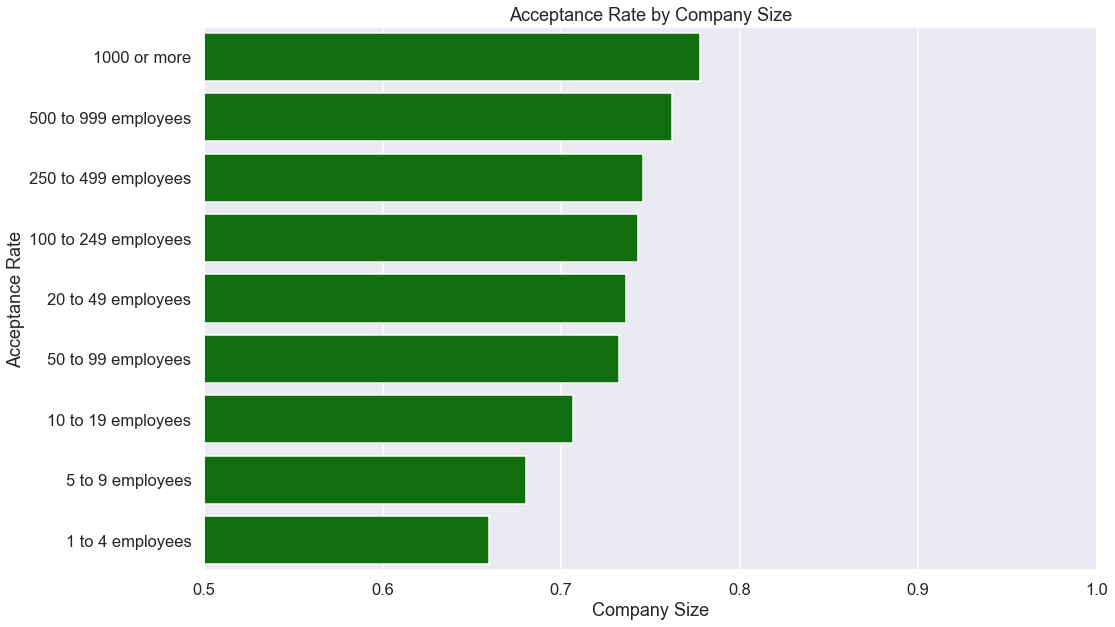

In [31]:
table = pd.crosstab(cleaned.COMPANY_SIZE, cleaned.CASE_STATUS)
table['Certified'] = table['Certified'] + table['Certified-Expired']
# table = table.drop(['Certified', 'Certified-Expired'], axis=1)

table['ACCEPTANCE_RATE'] = table['Certified']/table.sum(axis=1)
table = table[['ACCEPTANCE_RATE']].sort_values('ACCEPTANCE_RATE', ascending = False)

plt.figure(figsize = (16, 10))

ax = sns.barplot(y = table.index, x = table.ACCEPTANCE_RATE, color = 'Green', orient='h')
ax.set(xlabel = 'Acceptance Rate', ylabel = 'Company Size', xlim=(0.5, 1))
ax.set_title('Acceptance Rate by Company Size')

## Acceptance Rate by Minimum Education Required

Text(0.5, 1.0, 'Acceptance Rate by Company Size')

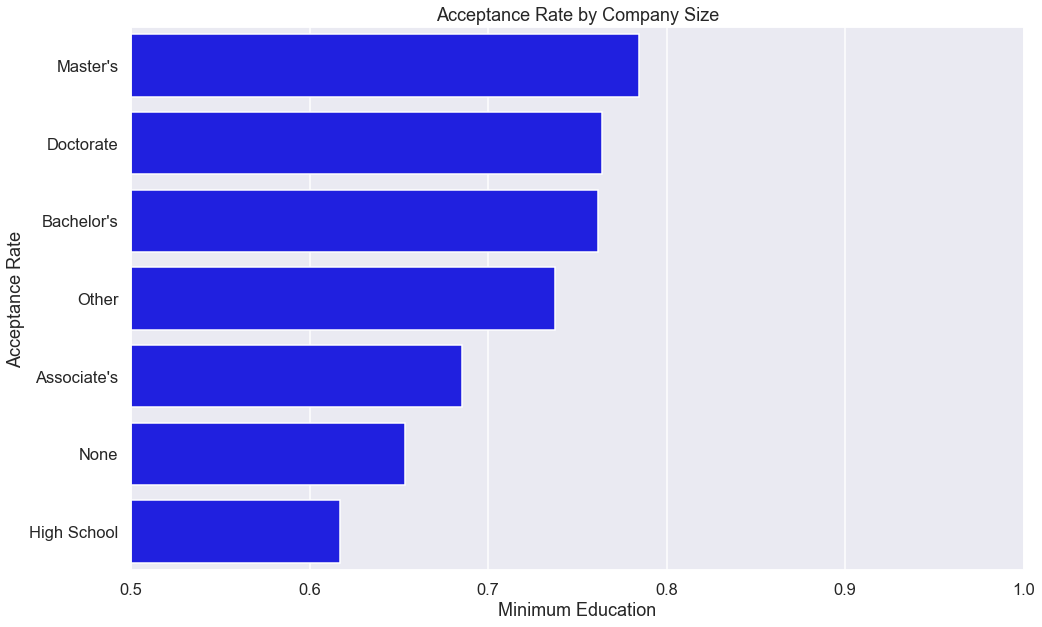

In [32]:
table = pd.crosstab(cleaned.MINIMUM_EDUCATION, cleaned.CASE_STATUS)
table['Certified'] = table['Certified'] + table['Certified-Expired']
# table = table.drop(['Certified', 'Certified-Expired'], axis=1)

table['ACCEPTANCE_RATE'] = table['Certified']/table.sum(axis=1)
table = table[['ACCEPTANCE_RATE']].sort_values('ACCEPTANCE_RATE', ascending = False)

plt.figure(figsize = (16, 10))

ax = sns.barplot(y = table.index, x = table.ACCEPTANCE_RATE, color = 'Blue', orient='h')
ax.set(xlabel = 'Acceptance Rate', ylabel = 'Minimum Education', xlim=(0.5, 1))
ax.set_title('Acceptance Rate by Minimum Education Required')

## Acceptance Rate by Hired Company States

Text(0.5, 1.0, 'Acceptance Rate by Company Size')

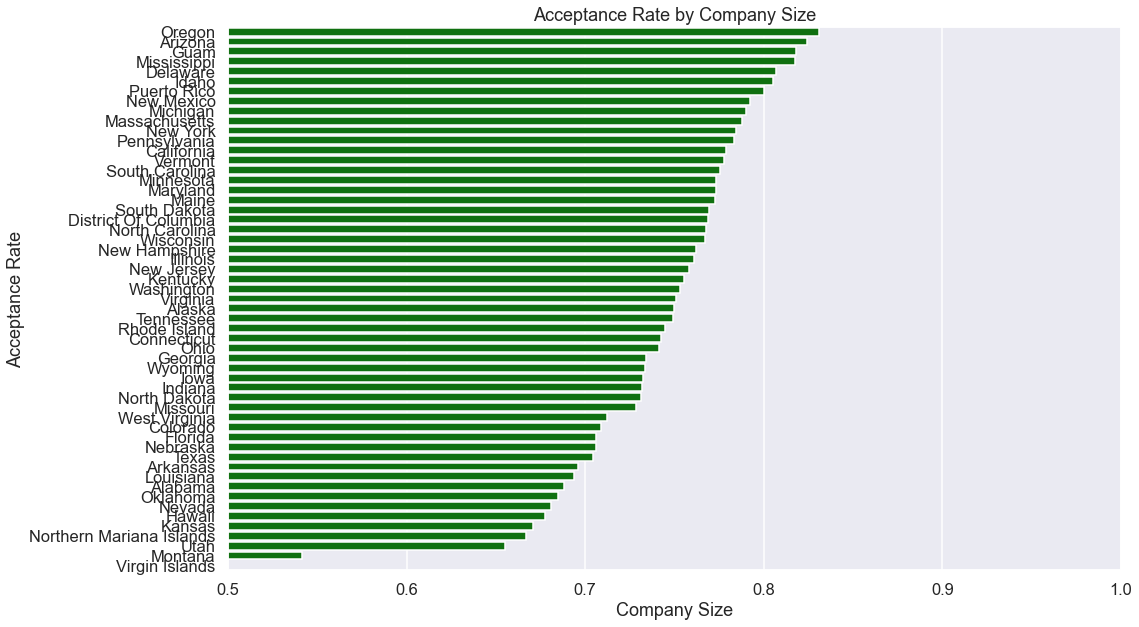

In [30]:
table = pd.crosstab(cleaned.WORKSITE_STATE, cleaned.CASE_STATUS)
table['Certified'] = table['Certified'] + table['Certified-Expired']
# table = table.drop(['Certified', 'Certified-Expired'], axis=1)

table['ACCEPTANCE_RATE'] = table['Certified']/table.sum(axis=1)
table = table[['ACCEPTANCE_RATE']].sort_values('ACCEPTANCE_RATE', ascending = False)

plt.figure(figsize = (16, 10))

ax = sns.barplot(y = table.index, x = table.ACCEPTANCE_RATE, color = 'Green', orient='h')
ax.set(xlabel = 'Acceptance Rate', ylabel = 'States', xlim=(0.5, 1))
ax.set_title('Acceptance Rate by Hired Company States')

## Average Duration by Visa Type

Text(0.5, 1.0, 'Average Duration by Visa Type')

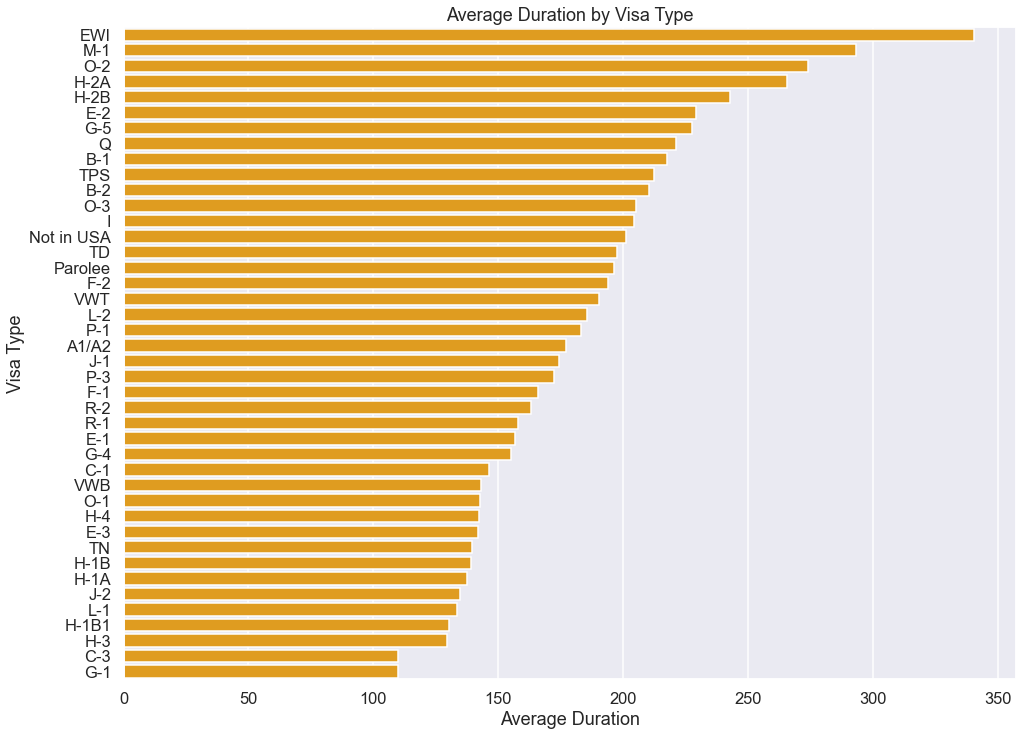

In [62]:
plt.figure(figsize = (16, 12))

table = cleaned.groupby("CLASS_OF_ADMISSION", as_index=False)["CASE_DURATION"].mean().sort_values('CASE_DURATION', ascending=False)

ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'orange', orient='h')
ax.set(ylabel = 'Visa Type', xlabel = 'Average Duration')
ax.set_title('Average Duration by Visa Type')

Text(0.5, 1.0, 'Average Duration by Salary Level')

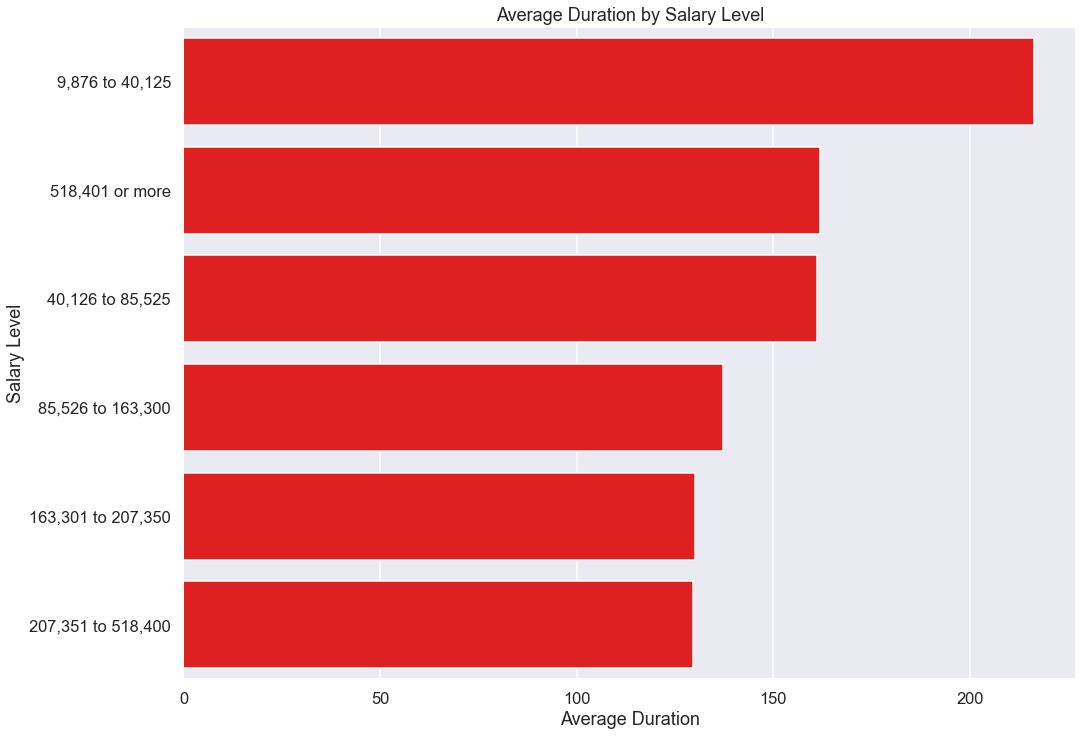

In [64]:
plt.figure(figsize = (16, 12))

table = cleaned.groupby("SALARY_LEVEL", as_index=False)["CASE_DURATION"].mean().sort_values('CASE_DURATION', ascending=False)

ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'red', orient='h')
ax.set(ylabel = 'Salary Level', xlabel = 'Average Duration')
ax.set_title('Average Duration by Salary Level')

Text(0.5, 1.0, 'Average Duration by Skill Level')

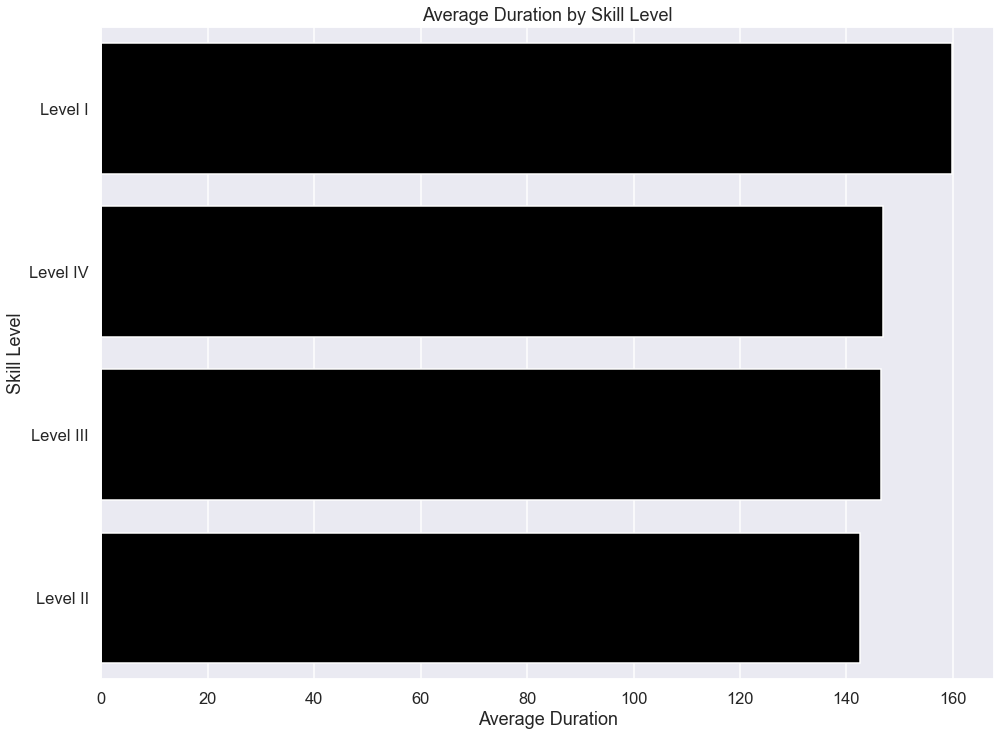

In [66]:
plt.figure(figsize = (16, 12))

table = cleaned.groupby("PW_SKILL_LEVEL", as_index=False)["CASE_DURATION"].mean().sort_values('CASE_DURATION', ascending=False)

ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'Black', orient='h')
ax.set(ylabel = 'Skill Level', xlabel = 'Average Duration')
ax.set_title('Average Duration by Skill Level')

## Explanatory Analysis

We were able to identify that applicant from a larger company has higher chance of getting accepted for the visa. Educations were considered important but as long as the applicant has above bachelor's degree, acceptance rate seems to be similar near high 70%. State wise, applicants with job located in Oregon, Arizona, Guam and 3 other States showed around 80% but I believe this is because the number of applicants were low in these states. EWI Visa had the highest average duration until the decision with around 350 days. The most famous Visa type in the US, H-1B was one of the lowest with around 125 days. Unfortunately, Lowest salary level applications took average of more than 200 days until decision. As per skill wise, level 1 skilled applicants took the longest time but not much change from other levels.

In [338]:
# PIP Installation of Pandas Profiling
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
from pandas_profiling import ProfileReport

ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Note: you may need to restart the kernel to use updated packages.


In [335]:
profile = ProfileReport(cleaned, title="Pandas Profiling Report")
profile.to_file("report_Albert_Seo.html")